# Interpolación

Dado un conjunto de puntos (nodos) $\{x_i,y_i\}$ con $i=0,\ldots,n$, que provienen de una función $f:\mathbb{R}\to\mathbb{R}$ que no conocemos (o no se puede calcular), se desea hallar una función $p(x)$ tal que:

$$p(x_i) = y_i \quad \forall i=0,\ldots,n.$$

A diferencia de mínimos cuadrados, en este caso se desea que la función interpolante $p(x)$ pase por **todos** los puntos de la grilla.

> **Aplicaciones:** Reconstrucción de imágenes, aumento de resolución de una señal, interpolación en tablas, cálculo de funciones no expresables de forma cerrada, etc.

## Interpolación polinómica

En la interpolación polinómica, se busca un *único polinomio* $p:\mathbb{R}\to\mathbb{R}$ que pase por todos los puntos. Como hay $n+1$ puntos, se requiere al menos de un polinomio de grado $n$ para hacer la interpolación.

Sea $p(x) = a_0 + a_1x + \ldots + a_n x^n$. Tenemos $n+1$ incógnitas, y planteando que $p(x_i)=y_i$ para cada $i$ queda el sistema:

$$\left\{\begin{array}{c} a_0 + a_1 x_0 + \ldots + a_n x_0^n  = y_0 \\  a_0 + a_1 x_1 + \ldots + a_n x_1^n  = y_1 \\\vdots \\  a_0 + a_1 x_n + \ldots + a_n x_n^n = y_n \end{array} \right.$$

### Matriz de Vandermonde

El sistema anterior puede escribirse de la forma $A \theta = y$ siendo:

$$A = \left(\begin{array}{cccc} 1 & x_0 & \cdots & x_0^n \\  1 & x_1 & \cdots & x_1^n \\ \vdots & \vdots & \cdots & \vdots \\ 1 & x_n & \cdots & x_n^n \end{array} \right), \quad \theta = \left(\begin{array}{c} a_0 \\ a_1 \\ \vdots \\ a_n \end{array} \right), \quad y=\left( \begin{array}{c} y_0 \\ y_1 \\ \vdots \\ y_n \end{array} \right).$$


La matriz $A$ (que depende de los $x_i$) se le conoce como *matriz de Vandermonde*, y en general está mal condicionada. Ya vimos este problema a la hora de hacer mínimos cuadrados: las columnas de $A$ son muy dispares y eso genera alto no. de condición.

Resolver el sistema $A\theta = y$ es entonces **numéricamente inestable**.

### Bases de polinomios

El procedimiento anterior puede pensarse de la siguiente forma: 

* Escribir el espacio de polinomios de grado $n$ en su base canónica $\{1, x,x^2,\ldots,x^n\}$.
* Encontrar las coordenadas del polinomio $p$ tal que $p(x_i)=y_i$.

Al usar la base canónica, el cálculo de coordenadas implica resolver el sistema usando Vandermonde. Esto es inestable

**Idea:** Escribir el espacio de polinomios usando otras bases, que permitan calcular los coeficientes más fácilmente.

## Polinomios de Lagrange

Dados los nodos $x_i$, consideremos el siguiente polinomio:

$$L_i(x) = \frac{(x-x_0)\cdots (x-x_{i-1}) (x-x_{i+1})\cdots (x-x_n)}{(x_i-x_0)\cdots (x_i-x_{i-1}) (x_i-x_{i+1})\cdots (x_i-x_n)} = \frac{\prod_{j=0,j\neq i}^n (x-x_j)}{\prod_{j=0,j\neq i}^n (x_i-x_j)}.$$

**Propiedades:**

* Para cada $i$, $L_i(x_i) = 1$.
* Para cada $j\neq i$, $L_i(x_j) = 0$.
* El conjunto $\{L_0(x),\ldots,L_n(x)\}$ es una base del espacio de polinomios de grado $n$.

Resta hallar ahora las coordenadas del polinomio $p(x)$ en esta base. Expresamos $p$ como:

$$ p(x) = c_0 L_0(x) + c_1 L_1(x) + \ldots + c_n L_n(x).$$

Imponiendo que $p(x_i)=y_i$ nos queda:

$$ y_i = p(x_i) = c_0 L_0(x_i) + c_1 L_1(x_i) + \ldots + c_i L_i(x_i) + \ldots + c_n L_n(x_i) = c_i,$$

ya que todos los términos $i\neq j$ son $0$ y el $i=j$ es $1$. Por lo tanto, los coeficientes en esta base simplemente son los $y_i$ de los datos (dicho de otro modo, en esta base la matriz $A$ es la identidad).

El polinomio interpolante es entonces:

$$ p(x) = \sum_{i=0}^n y_i L_i (x).$$

Una vez calculada la base, la combinación lineal da el polinomio deseado.

### Ejemplo

Veamos un ejemplo con $n=4$ utilizando el paquete `Polynomials` de Julia. Este paquete permite construir un polinomio de la siguiente manera:

* `p=Poly(v);` construye el polinomio `p` a partir de los coeficientes en `v` (de $0$ a $n$).
* `p=poly(v);` construye el polinomio `p` con raíces dadas por el vector `v`.
* Dado `p` se puede evaluar el polinomio usando `p(x)` con `x` real o `polyval(p,x)`.
* Las operaciones `+`, `-`, `*`, etc aplican a polinomios.

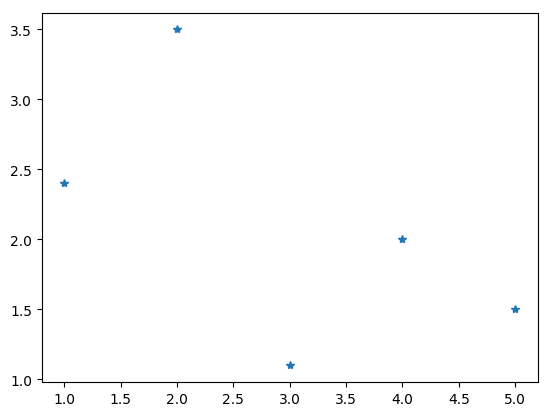

In [1]:
using Polynomials, PyPlot

x=collect(1.0:5.0);
y=[2.4;3.5;1.1;2.0;1.5]

plot(x,y,"*");

In [2]:
## Matriz de Vandermonde
n=length(x)-1;

A=ones(x);
for i=1:n
    A = [A x.^i];
end


println("No. de condición: $(cond(A))")
A


No. de condición: 26169.68797063654


5×5 Array{Float64,2}:
 1.0  1.0   1.0    1.0    1.0
 1.0  2.0   4.0    8.0   16.0
 1.0  3.0   9.0   27.0   81.0
 1.0  4.0  16.0   64.0  256.0
 1.0  5.0  25.0  125.0  625.0

In [3]:
## Calculo coeficientes:

theta = A\y;

#construyo el polinomio a partir de sus coeficientes
p1 = Poly(theta)

Poly(-20.50000000000001 + 42.775000000000006*x - 25.32083333333333*x^2 + 5.925*x^3 - 0.4791666666666667*x^4)

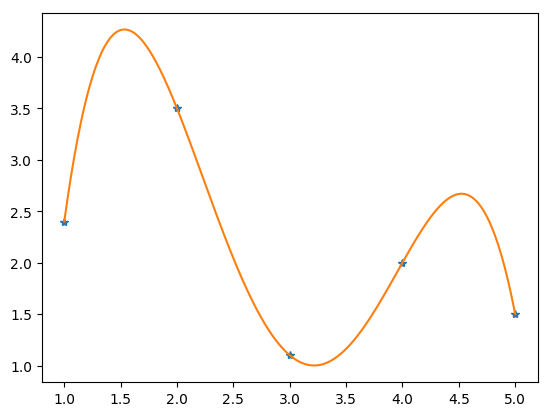

In [4]:
## evaluo en un vector con más resolución

xx=(1:.01:5);

plot(x,y,"*")
plot(xx,p1(xx));

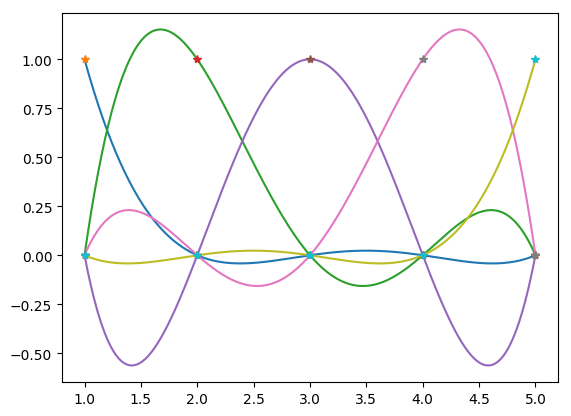

In [5]:
## Metodo de lagrange

## Construyo la base de polinomios de lagrange y la guardo en el vector L (de polinomios)

L=[];

for i=1:length(x)
    
    raices = [x[1:i-1];x[i+1:end]];
    Li = poly(raices);    #Li tiene las raices en todos los nodos menos el i
    Li = Li/Li(x[i]);      #Con esto se normaliza a L_i(x_i)=1
    
    push!(L,Li);          #Lo agrego al array
    
    plot(xx,Li(xx))       #Grafico cada uno para ver la base.
    plot(x,Li(x),"*")
end


    

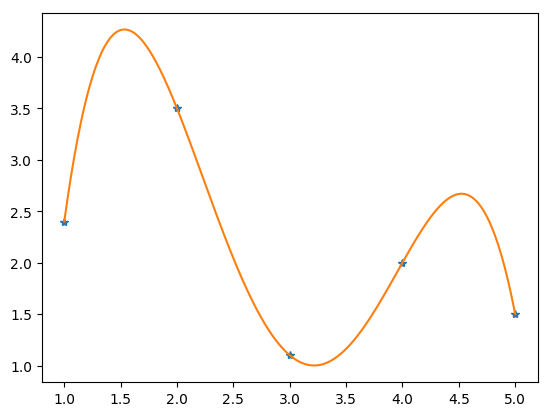

Poly(-20.5 + 42.77499999999999*x - 25.320833333333333*x^2 + 5.924999999999999*x^3 - 0.4791666666666665*x^4)

In [6]:
## Construyo el polinomio interpolante

p2 = sum(y.*L);

plot(x,y,"*")
plot(xx,p2(xx))

p2

## Polinomios de Newton

El problema de utilizar la base anterior es que, si aparecen nuevos puntos, debo recalcular *todos* los polinomios de la base.

Esto puede evitarse utilizando una nueva base, denominada *base de Newton*:

$$N_0(x) = 1, \quad N_i(x) = (x-x_0)(x-x_1)\cdots (x-x_{i-1}), \quad i=1,\ldots,n.$$

**Propiedades:**

* $N_i(x_j) = 0$ si $i>0$ y $j< i$.
* $\{N_0(x),\ldots, N_{n}(x)\}$ es una base de los polinomios de grado $n$.
* Si aparece un nuevo punto, solo hace falta agregar un polinomio a la base.

Escribimos ahora $p(x) = \sum_{i=0}^n c_i N_i(x)$ para hallar las coordenadas $c_i$. Imponiendo que el polinomio pase por cada punto nos queda:

$$p(x_0) = c_0 = y_0 \Rightarrow c_0 = y_0 = f[x_0].$$

$$p(x_1) = c_0 + c_1(x-x_0) = y_1 \Rightarrow c_1 = \frac{y_1-y_0}{x_1 - x_0} = \frac{f[x_1]-f_[x_0]}{x_1-x_0}.$$

Continuando con la sustitución, puede hallarse que los coeficientes se calculan mediante el **esquema de diferencias divididas**.

## Diferencias divididas

Es un esquema para calcular los coeficientes del polinomio de Newton a partir de cocientes incrementales.

> **Definición:**
> Dados $\{x_i , y_i\}_{i=0,\ldots,n}$ nodos de la interpolación se definen recursivamente:

$$f[x_i] = y_i \quad i=0,\ldots,n.$$

$$f[x_i,\ldots,x_{i+k}] = \frac{f[x_{i+1}\ldots x_{i+k}] - f[x_{i}\ldots x_{i+k-1}]}{x_{i+k}-x_i}.$$

Entonces el polinomio de Newton queda expresable como:

$$P_n(x) = f[x_0] + f[x_0,x_1](x-x_0) + f[x_0,x_1,x_2](x-x_0)(x-x_1)+ \ldots + f[x_0,\ldots,x_n](x-x_0)\ldots(x-x_{n-1}).$$

*Observación*: el orden en que se agregan los puntos es irrelevante.

### Esquema de cálculo:

Típicamente se utiliza el siguiente esquema para calcular las diferencias divididas:

![dif divididas](https://wikimedia.org/api/rest_v1/media/math/render/svg/d60ef92b00038923edcedaecccbadd25373b07c1)

El algoritmo en Julia es el siguiente:

In [7]:
function difDivididas(x,y)
    n=length(x);
    
    D=zeros(n,n);
    
    D[:,1] = y;
    
    for j=2:n
        for i=j:n
            D[i,j] = (D[i,j-1]-D[i-1,j-1])/(x[i]-x[i-j+1]);
        end
    end
    
    c=diag(D)
    return c,D
    
end;


In [8]:
c,D=difDivididas(x,y)
[x D]

5×6 Array{Float64,2}:
 1.0  2.4   0.0   0.0    0.0        0.0     
 2.0  3.5   1.1   0.0    0.0        0.0     
 3.0  1.1  -2.4  -1.75   0.0        0.0     
 4.0  2.0   0.9   1.65   1.13333    0.0     
 5.0  1.5  -0.5  -0.7   -0.783333  -0.479167

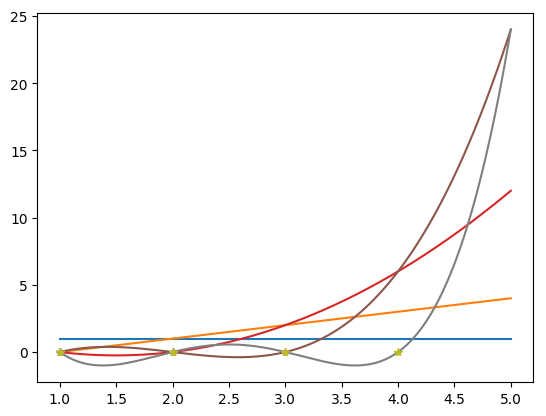

In [9]:
N=[Poly(1)];
plot(xx,N[1](xx))
for i=2:length(x)
    
    raices = x[1:i-1];
    Ni = poly(raices);    #Li tiene las raices en todos los nodos menos el i
 
    push!(N,Ni);          #Lo agrego al array
    
    plot(xx,Ni(xx))       #Grafico cada uno para ver la base.
    plot(raices,Ni(raices),"*")
end


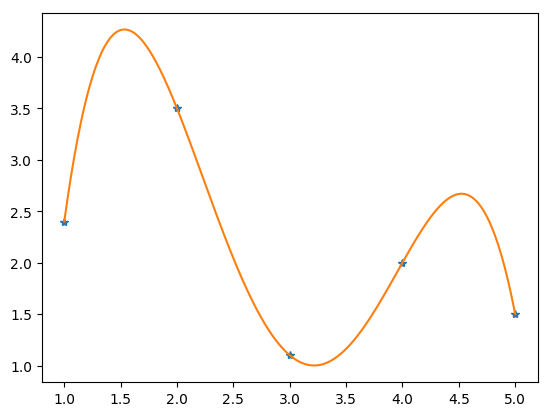

Poly(-20.5 + 42.775*x - 25.320833333333333*x^2 + 5.924999999999999*x^3 - 0.47916666666666663*x^4)

In [10]:
p3 = sum(c.*N)

plot(x,y,"*")
plot(xx,p3(xx))

p3

## Error de interpolación

Supongamos ahora que los puntos $\{x_i,y_i\}$ provienen de una función $f:\mathbb{R}\to\mathbb{R}$ con suficientes derivadas continuas. Queremos estimar una cota del error cometido al aproximar dicha función $f$ por su polinomio interpolante.

Notemos que, al ser único dicho polinomio, no importa qué forma usemos para calcularlo, el error matemático es el mismo

> **Teorema** (Error de interpolación):
>
> Si $f:\mathbb{R}\to\mathbb{R}$ es $n+1$ veces derivable, $x_0<x_1<\ldots<x_n$ y $P_n(x)$ es el polinomio tal que $P_n(x_i) = y_i = f(x_i)$ para todo $i=0,\ldots,n$ entonces:
>
> $$f(x) - P_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!} (x-x_0) \ldots (x-x_n) \quad \forall x\in[x_0,x_n].$$
>
>con $\xi\in(x_0,x_n)$ un punto intermedio.
>
> En particular:
> $$|f(x) - P_n(x)| \leqslant \frac{|f^{(n+1)}(\xi)|}{(n+1)!}(x_n-x_0)^{n+1}.$$

**Demostración**:

Observemos primero que la igualdad del teorema es trivial si $x=x_i$ ya que ambos términos son $0$. Sea ahora $x\in (x_0,x_n)$, $x\neq x_i$ construimos la siguiente función:

$$ \phi(t) = f(t) - P_n(t) - R(t-x_0)(t-x_1)\ldots (t-x_n), $$

eligiendo $R$ de manera de que $\phi(x) = 0$, es decir:

$$R = \frac{f(x)-P_n(x)}{(x-x_0)\ldots(x-x_n)}$$.

La función $\phi(t)$ es $n+1$ veces derivable (porque $f$ lo es) y tiene entonces $n+2$ raíces en $[x_0,x_n]$ a saber:
* Todos los $x_i$, $i=0,\ldots,n$.
* El punto $x$ por construcción.

Si $\phi(t)$ tiene $n+2$ raíces, entonces por el teorema de Rolle, $\phi'(t)$ tiene $n+1$ raíces. Recursivamente, $\phi''$ tiene $n$ raíces, y así sucesivamente concluimos que $\phi^{(n+1)}$ tiene $1$ raíz en el intervalo. Sea $\xi$ esta raíz.

Calculemos la derivada $n+1$ de $\phi$:

$$\phi^{(n+1)} (t) = f^{(n+1)} (t) - R(n+1)!,$$

ya que el polinomio de grado $n$ desaparece al derivar $n+1$ veces, y de la productoria solo queda la constante del término de mayor orden, $R$, multiplicada por $(n+1)!$. 

Evaluando lo anterior en $\xi$, la raíz de $\phi^{(n+1)}(t)$ se tiene que:

$$0 = \phi^{(n+1)} (\xi) = f^{(n+1)} (\xi) - R(n+1)! \Rightarrow R = \frac{f^{(n+1)} (\xi)}{(n+1)!}.$$

Sustituyendo $R$ por esta nueva expresión en la definición se obtiene el teorema.

Para ver la cota del error, solo hace falta tomar valor absoluto y acotar $(x-x_i)$ por $(x_n-x_0)$ (cada subintervalo por el intervalo completo).

## Ejercicios

1. Hallar el polinomio interpolante para la función $\sin(x)$ con $x\in[0,\pi/2]$ usando la tabla de valores conocidos exactamente es decir: 
$$\sin(0) = 0, \quad \sin(\pi/6) = 1/2, \quad \sin(\pi/4) = \sqrt{2}/2, \quad \sin(\pi/3) = \sqrt{3}/2, \quad \sin(\pi/2) = 1.$$
Estimar el error cometido y comparar con la cota del teorema.

2. Hallar el polinomio interpolante para la función $f(x) = \frac{1}{1+25x^2}$ con $x_i=\{-4,-3,\ldots,3,4\}$ y observar el *fenómeno de Runge*.